In [505]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [506]:
df100 = pd.read_csv("data/1.0.csv")
df131 = pd.read_csv("data/1.31.csv")
df132 = pd.read_csv("data/1.32.csv")

## Settings

In [507]:
percentageBarGraphMode = False
barGraphMode = False
percentageDefaultGraphMode = True
defaultGraphMode = False

## Concatenation of Data

In [508]:
relevantColumns = ['id', 'serverTime', 'playerId', 'type', 'section']

#part100 = df100.loc[:,relevantColumns]
part131 = df131.loc[:,relevantColumns]
part132 = df132.loc[:,relevantColumns]

#df = pd.concat([part100, part131, part132])
df = pd.concat([part131, part132])

## Generic Treatment

Generic graph treatment

In [509]:

#percentageFormat = "3.2f"

def innerGenericTreatment( table, graphKind, xlabel, ylabel, isXPercentage=False, isYPercentage=False, xTotalCount=0, yTotalCount=0 ):
        
    if graphKind is None:
        ax = table.plot()
    else:
        ax = table.plot(kind=graphKind)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend('') 
    
    if isXPercentage:
        customXTicks = pd.Series(range(0,10,1))*xTotalCount/10
        ax.set_xticks(customXTicks)
        ax.set_xticklabels(['{:3.0f}%'.format((x*100)/(xTotalCount)) for x in customXTicks])
        ax.set_xlim([0, xTotalCount])
        
    if isYPercentage:
        customYTicks = pd.Series(range(0,10,1))*yTotalCount/10
        ax.set_yticks(customYTicks)
        ax.set_yticklabels(['{:3.0f}%'.format((x*100)/(yTotalCount)) for x in customYTicks])
        ax.set_ylim([0, yTotalCount])
    
    return

def genericTreatment( dataTable, xLabel, yLabel, xTotalCount=0, yTotalCount=0, isXPercentage=True, isYPercentage=False ):
    percentageXLabel = xLabel
    if isXPercentage:
        percentageXLabel = (percentageXLabel+" (%)")
    percentageYLabel = yLabel
    if isYPercentage:
        percentageYLabel = (percentageYLabel+" (%)")            
    if percentageBarGraphMode:
        innerGenericTreatment( dataTable, 'bar', percentageXLabel, percentageYLabel,
                         isXPercentage, isYPercentage, xTotalCount, yTotalCount )
    if barGraphMode:
        innerGenericTreatment( dataTable, 'bar', xLabel, yLabel)
    if percentageDefaultGraphMode:
        innerGenericTreatment( dataTable, None, percentageXLabel, percentageYLabel,
                         isXPercentage, isYPercentage, xTotalCount, yTotalCount )
    if defaultGraphMode:
        innerGenericTreatment( dataTable, None, xLabel, yLabel)


gameSessionCount=450
#death=1135
mean#death=2.52222222222
#pickup=366
mean#pickup=0.813333333333
#equip=807
mean#equip=1.79333333333
#craft=195
mean#craft=0.433333333333
#complete=47
mean#complete=0.104444444444
#switch=147
mean#switch=0.326666666667
#reach=1158
mean#reach=2.57333333333


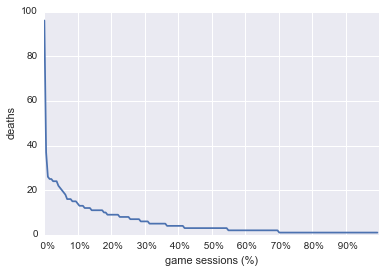

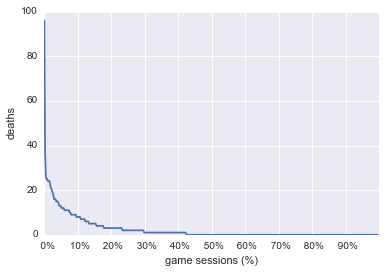

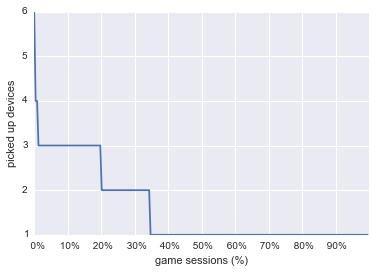

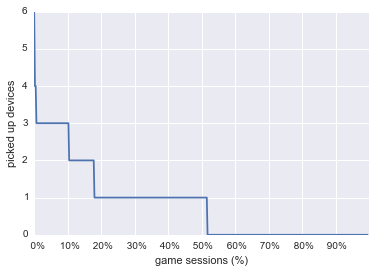

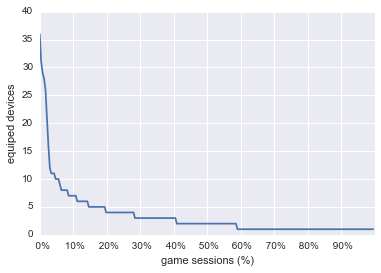

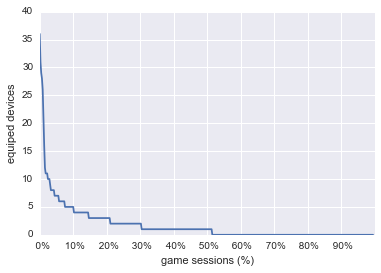

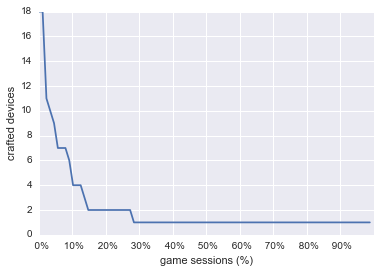

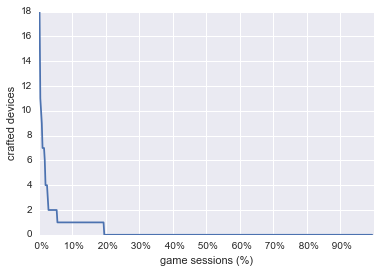

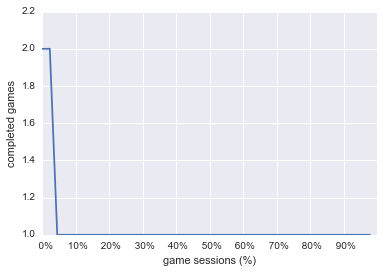

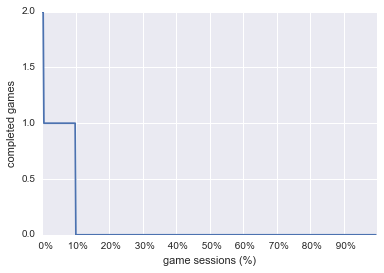

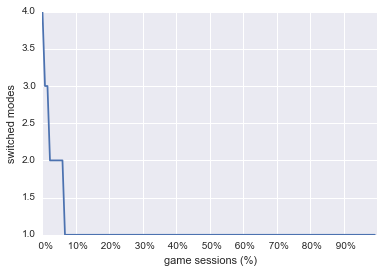

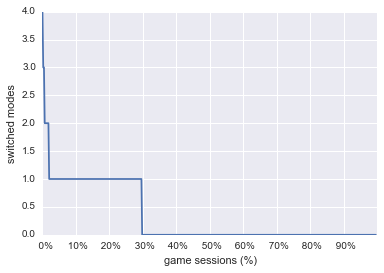

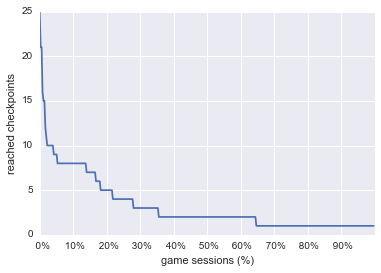

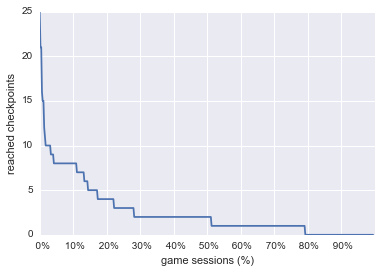

In [510]:
gameSessionCount = df["playerId"].nunique()
print 'gameSessionCount={0}'.format(gameSessionCount)

events = ['death', 'pickup', 'equip', 'craft', 'complete', 'switch', 'reach']
#events = ['complete']

graphLabels = pd.Series(['deaths','picked up devices','equiped devices',
                         'crafted devices','completed games', 'switched modes', 'reached checkpoints'],index=events)
#graphLabels = pd.Series(['completed games'],index=events)   

# legacy
alternates = pd.Series([[],[],[],[],['completed'],['switched:'],['reached']],index=events)
#alternates = pd.Series([['completed']],index=events)
#alternates = pd.Series([[]],index=events)

for event in events:
    studiedEvent = event    

    columnName = studiedEvent+"s"
    graphLabel = graphLabels[event]

    studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
    
    # legacy
    for alternate in alternates[studiedEvent]:
        studiedEventCount = studiedEventCount + df[df["type"]==alternate]["id"].count()
    
    print '#{0}={1}'.format(studiedEvent,studiedEventCount)
    mean = studiedEventCount / float(gameSessionCount)
    print 'mean#{0}={1}'.format(studiedEvent, mean)

    positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()
    
    # legacy
    for alternate in alternates[studiedEvent]:
        alternateTable = df[df["type"]==alternate]["playerId"].value_counts()
        positiveGameSessions = positiveGameSessions.combine_first(alternateTable)
        positiveGameSessions = positiveGameSessions.sort_values(ascending=False)

    positiveGameSessionCount = positiveGameSessions.count()
    positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

    
    genericTreatment(positiveGameSessionCountTable, "game sessions", graphLabel,
                     positiveGameSessionCount)

    positiveGameSessionCountTable.describe()

    negativeGameSessionCountSeries = pd.Series(0, index=(list(range(positiveGameSessionCount,gameSessionCount-1))))
    negativeGameSessionCountTable = pd.DataFrame({columnName: negativeGameSessionCountSeries})

    fullEventGameSessionCountTable = pd.concat([positiveGameSessionCountTable, negativeGameSessionCountTable]) 

    genericTreatment(fullEventGameSessionCountTable, "game sessions", graphLabel,
                     gameSessionCount)
    

    fullEventGameSessionCountTable.describe()
    

## Specific Treatment
### Events

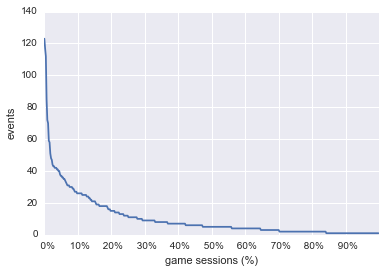

In [511]:
eventstable = pd.DataFrame({"events" : df["playerId"].value_counts().values})

eventsLabel = "events"
totalEventsCount = int(eventstable.count())
genericTreatment(eventstable, "game sessions", eventsLabel, totalEventsCount)

### Checkpoints


checkpoints=
Checkpoint00    None
Checkpoint01     171
Checkpoint02      80
Checkpoint03      31
Checkpoint04      23
Checkpoint05      23
Checkpoint06      26
Checkpoint07      23
Checkpoint08      29
Name: section, dtype: object

totalCheckpointsCount=406

reachedGameSessionCount=117

neverReachedGameSessionCount=333

mostReachedCheckpointCount=171

fullMostReachedCheckpointCount=450

fullCheckpointsTable=
  checkpoints
0         450
1         171
2          80
3          31
4          23
5          23
6          26
7          23
8          29

maxCheckpointCounts=
Checkpoint00    None
Checkpoint01      47
Checkpoint02      29
Checkpoint03       4
Checkpoint04       5
Checkpoint05       2
Checkpoint06       3
Checkpoint07       7
Checkpoint08      20
Name: maxCheckpoint, dtype: object

fullMaxCheckpointCountsTable=
  fullMaxCheckpoint
0               333
1                47
2                29
3                 4
4                 5
5                 2
6                 3
7         

,fullMaxCheckpoint
count,9
unique,9
top,47
freq,1


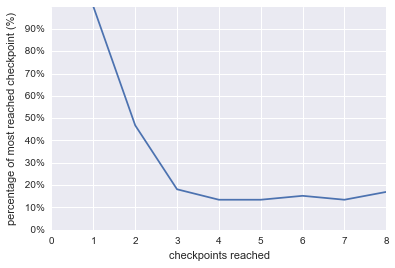

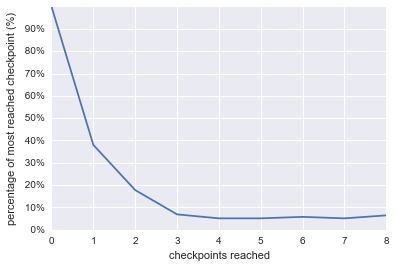

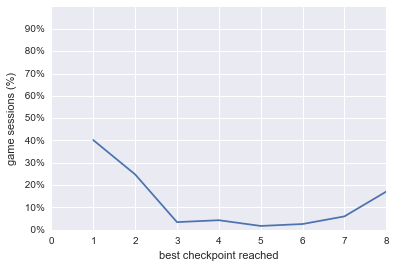

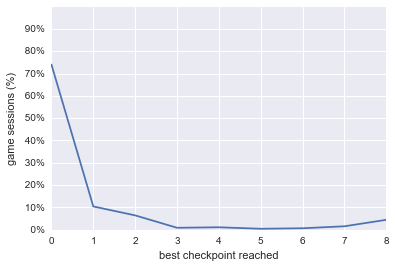

In [512]:
checkpoints = df[df["type"]=="reach"]["section"].value_counts()
checkpoints['Checkpoint00'] = None
checkpoints = checkpoints.sort_index()
totalCheckpointsCount = checkpoints.sum()
print '\ncheckpoints=\n{0}'.format(checkpoints)
print '\ntotalCheckpointsCount={0}'.format(totalCheckpointsCount)


reachedGameSessions = df[df["type"]=="reach"]["playerId"].value_counts()
reachedGameSessionCount = reachedGameSessions.count()
print '\nreachedGameSessionCount={0}'.format(reachedGameSessionCount)
neverReachedGameSessionCount = gameSessionCount - reachedGameSessionCount
print '\nneverReachedGameSessionCount={0}'.format(neverReachedGameSessionCount)

mostReachedCheckpointCount = checkpoints.values.max()
print '\nmostReachedCheckpointCount={0}'.format(mostReachedCheckpointCount)

checkpointstable = pd.DataFrame({"checkpoints" : checkpoints.values})
#reachedGameSessionCount
genericTreatment( checkpointstable, "checkpoints reached", "percentage of most reached checkpoint", 0, mostReachedCheckpointCount, False, True )
#plt.ylim(0,mostReachedCheckpointCount)


fullCheckpointsTable = checkpointstable
fullCheckpointsTable['checkpoints'][0] = gameSessionCount
fullMostReachedCheckpointCount = fullCheckpointsTable.values.max()
print '\nfullMostReachedCheckpointCount={0}'.format(fullMostReachedCheckpointCount)
print '\nfullCheckpointsTable=\n{0}'.format(fullCheckpointsTable)
#gameSessionCount
genericTreatment( fullCheckpointsTable, "checkpoints reached", "percentage of most reached checkpoint", 0, fullMostReachedCheckpointCount, False, True )
#plt.ylim(0,fullMostReachedCheckpointCount)


checkpointsByGameSession = df[df["type"]=="reach"].loc[:,['section','playerId']]
grouped = checkpointsByGameSession.groupby("playerId")
maxCheckpointWithIDs = grouped.max()
maxCheckpointWithIDs.head()

maxCheckpointTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointWithIDs.values.flatten()})
maxCheckpointCounts = maxCheckpointTable["maxCheckpoint"].value_counts()
maxCheckpointCounts['Checkpoint00'] = None
maxCheckpointCounts = maxCheckpointCounts.sort_index()
print '\nmaxCheckpointCounts=\n{0}'.format(maxCheckpointCounts)

maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})
genericTreatment( maxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, reachedGameSessionCount, False, True )
maxCheckpointCountsTable.describe()

fullMaxCheckpointCounts = maxCheckpointCounts
fullMaxCheckpointCounts['Checkpoint00'] = neverReachedGameSessionCount
fullMaxCheckpointCountsTable = pd.DataFrame({"fullMaxCheckpoint" : fullMaxCheckpointCounts.values})

genericTreatment( fullMaxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, gameSessionCount, False, True )

print '\nfullMaxCheckpointCountsTable=\n{0}'.format(fullMaxCheckpointCountsTable)
fullMaxCheckpointCountsTable.describe()